In [237]:
import pandas as pd
df =pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv', names = ['A','B','C'])

In [6]:
df.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [7]:
import matplotlib.pyplot as plt

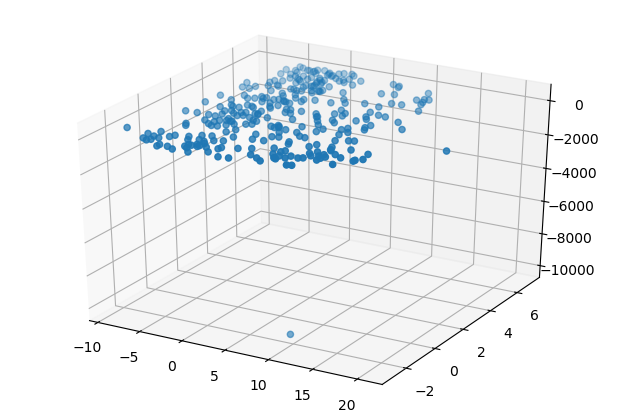

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig =plt.figure(dpi=100)
ax = Axes3D(fig)
ax.scatter(a,b,c)
plt.show()

Non Machine Learning way approach for verification in AI model

In [30]:
a= list(df['A'])
b= list(df['B'])
c= list(df['C'])

In [45]:
type(c)

list

In [63]:
ab= zip(a,b)
ac= zip(a,c)
bc= zip(b,c)

a_2 = sum(map(lambda i : i*i, a))
b_2 = sum(map(lambda i : i*i, b))
a_b = sum(i*j for i,j in ab)
a_c = sum(i*j for i,j in ac)
b_c = sum(i*j for i,j in bc)
           
X1 = (b_2*a_c-a_b*b_c)/(a_2*b_2-(a_b)**2)
X2 = (a_2*b_c-a_b*a_c)/(a_2*b_2-(a_b)**2)

In [64]:
b1

-9.111246017185074

In [65]:
X1

-9.147292542544912

In [66]:
X2

-4.646970815065509

In [69]:
import numpy as np

In [70]:
res = np.mean(c)-X1*np.mean(a)-X2*np.mean(b)

In [71]:
res

-11.01567167238912

In [ ]:
#y = -9.15*a-4.65b-11.02

Machine Learning approach

In [238]:
X = df.iloc[:,:2]
y = df.iloc[:, -1]

In [185]:
df = (df-df.mean())/df.std()

In [239]:
def cost_function(X,y, theta):
    Jetha = np.sum((X.dot(theta)-y)**2)/(2*len(y))
    return Jetha

In [240]:
def gradient_descent(X,y,theta, alpha, n):
    cost_list = [0]*n
    
    for i in range(0,n):
        hyp = X.dot(theta)
        loss = hyp-y
        gradient = X.T.dot(loss)/len(y)
        theta = theta-alpha*gradient
        cost = cost_function(X,y,theta)
        cost_list[i] = cost
        
    return theta, cost_list

In [251]:
theta = [0,0]
alpha = .001
n=1000

coefficients, cost_list = gradient_descent(X,y, theta, alpha, n)

In [273]:
coefficients

A   -9.147293
B   -4.646962
dtype: float64

Text(0.5, 1.0, 'Error vs. Iterations')

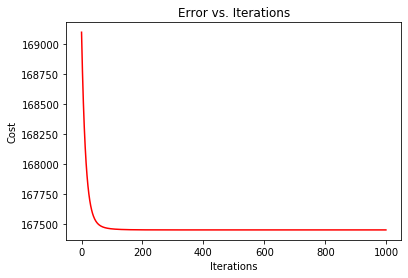

In [264]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(n), cost_list, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Iterations')  

In [274]:
intercept = np.mean(c)-coefficients[0]*np.mean(a)-coefficients[1]*np.mean(b)

In [275]:
intercept

-11.01568884359113

In [ ]:
#equation = 

In [263]:
def rmse(predict, actual):
    return np.sqrt(((predict-actual)**2).mean())

In [282]:
predictions = []
for i in range(0, len(df)):
    outcome = coefficients[0]*a[i]-coefficients[1]*b[i]-intercept
    predictions.append(outcome)

In [281]:
#model evaluation
rmse(predictions, df['C'])

579.2162260561704